# PS3: Deep learning
**Amir Rajak | ST119480**

In this problem set, you will experiment with fully-connected neural networks.

To start with, let's load the "breast cancer" data set from scikit-learn:

In [72]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle

data = load_breast_cancer()

y = np.matrix(data.target).T
X = np.matrix(data.data)
M = X.shape[0]
N = X.shape[1]

# Normalize each input feature

def normalize(X):
    M = X.shape[0] #Num of rows
    XX = X - np.tile(np.mean(X,0),[M,1]) #np.mean(X,0).shape -> (1,30)   #[X.shape[0],1] -> [569, 1]
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return XX

XX = normalize(X)

Next, let's represent a fully-connected neural network by two arrays W and b containing the weights and biases for each layer.

In [73]:
h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

def act(z):
    return 1/(1+np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod

def ff(x,W,b):
    L = len(W)-1
    a = x
    for l in range(1,L+1):
        z = W[l].T*a+b[l]
        a = act(z)
    return a

def loss(y,yhat):
    return -((1-y) * np.log(1-yhat) + y * np.log(yhat))


## Question 1

Write Python code to separate $\texttt{X},\texttt{y}$ randomly into a training set containing 80% of the data and a validation set consisting of the remaining 20% of the data.

In [74]:
# Code goes here

from sklearn.cross_validation import train_test_split
XX_train, XX_val, y_train, y_val = train_test_split(XX, y, test_size = 0.2) # random_state = 42 to use same data

Mt = XX_train.shape[0]
Mv = XX_train.shape[1]
Nt = XX_val.shape[0]
Nv = XX_val.shape[1]

print(XX_train.shape)
print(XX_val.shape)
print(y_train.shape)
print(y_val.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


## Question 2

Beginning with the training code we wrote together in class, write Python code to execute backpropagation with mini-batch size 1 on the training set, and plot the training loss and validation loss as a function of training iteration. Show the plot in this sheet.

In [75]:
%matplotlib inline
# Import modules
import matplotlib.pyplot as plt
def plot_graph(loss, label):
    plt.plot(range(0, (len(loss))), loss)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Iteration vs Loss: ' + label)
    print("%s : %f" % (label, loss[-1]))
    plt.show()
    plt.close()

Training Loss : 0.346562


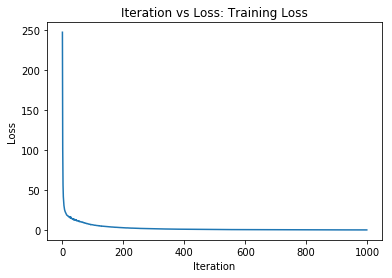

Validation Loss : 40.533381


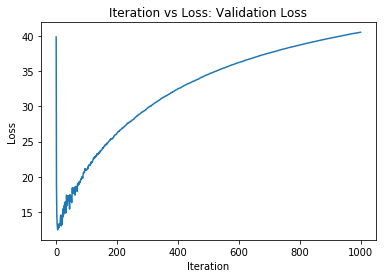

In [5]:
# Code goes here

train_loss = []
val_loss = []

def fn_empty_loss_list():
    train_loss.clear()
    val_loss.clear()

# Training Set
def fn_nn(alpha, max_iter, print_iter=False):
    for iter in range(0, max_iter):
        
        #For training
        train_loss_this_iter = 0
        order = np.random.permutation(Mt) #Mt -> num of train samples
        for i in range(0,Mt):

            # Grab the pattern order[i]

            x_this = XX_train[order[i],:].T
            y_this = y_train[order[i],0]

            # Feed forward step

            a = [x_this]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(W[l].T*a[l-1]+b[l])
                a.append(act(z[l]))
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])

            loss_this_pattern = loss(y_this, a[L][0,0])
            train_loss_this_iter = train_loss_this_iter + loss_this_pattern
            
            # Backprop step

            delta[L] = a[L] - y_this
            for l in range(L,0,-1):
                db[l] = delta[l].copy()
                dW[l] = a[l-1] * delta[l].T
                if l > 1:
                    delta[l-1] = np.multiply(actder(z[l-1]), W[l] *
                                 delta[l])

            # Check delta calculation

            if False:
                print('Target: %f' % y_this)
                print('y_hat: %f' % a[L][0,0])
                print(db)
                y_pred = ff(x_this,W,b)
                diff = 1e-3
                W[1][10,0] = W[1][10,0] + diff
                y_pred_db = ff(x_this,W,b)
                L1 = loss(y_this,y_pred)
                L2 = loss(y_this,y_pred_db)
                db_finite_difference = (L2-L1)/diff
                print('Original out %f, perturbed out %f' %
                     (y_pred[0,0], y_pred_db[0,0]))
                print('Theoretical dW %f, calculated db %f' %
                      (dW[1][10,0], db_finite_difference[0,0]))

            for l in range(1,L+1):            
                W[l] = W[l] - alpha * dW[l]
                b[l] = b[l] - alpha * db[l]
                
        if print_iter:
            if (iter+1) % mod == 0:
                print('Iteration %d Training loss %f' % (iter+1, train_loss_this_iter))
        train_loss.append(train_loss_this_iter)
        
        #For validation
        val_loss_this_iter = 0
        for i in range(0,Nt):
            #print("test")
            x_this = XX_val[i,:].T
            y_this = y_val[i,0]

            # Feed forward step

            a = [x_this]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(W[l].T*a[l-1]+b[l])
                a.append(act(z[l]))
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])

            loss_this_pattern = loss(y_this, a[L][0,0])
            val_loss_this_iter = val_loss_this_iter + loss_this_pattern

            # Check delta calculation

            if False:
                print('Target: %f' % y_this)
                print('y_hat: %f' % a[L][0,0])
                print(db)
                y_pred = ff(x_this,W,b)
                diff = 1e-3
                W[1][10,0] = W[1][10,0] + diff
                y_pred_db = ff(x_this,W,b)
                L1 = loss(y_this,y_pred)
                L2 = loss(y_this,y_pred_db)
                db_finite_difference = (L2-L1)/diff
                print('Original out %f, perturbed out %f' %
                     (y_pred[0,0], y_pred_db[0,0]))
                print('Theoretical dW %f, calculated db %f' %
                      (dW[1][10,0], db_finite_difference[0,0]))
                
        if print_iter:
            if (iter+1) % mod == 0:
                print('Iteration %d Validation loss %f' % (iter+1, val_loss_this_iter))
                
        val_loss.append(val_loss_this_iter)

#Mod handles print interval
mod = 100
fn_empty_loss_list()
# Run neural net 
# fn_nn(alpha, max_iter, print_iter)
fn_nn(0.03, 1000, False)

# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')


## Question 3

Perform several experiments with different numbers of layers and different numbers of hidden units. Demonstrate the phenomenon of overtraining, make a table showing the training and validation set performance of each of your models, and make a recommendation about which model is best based on validation set performance.

Training Loss : 0.165205


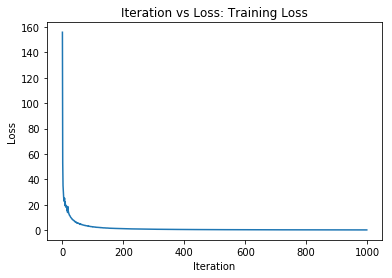

Validation Loss : 34.507632


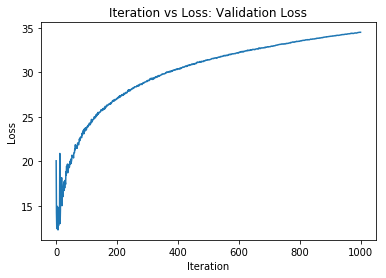

In [6]:
#Layer 3
h2 = 5
h1 = 6
L = len(W)-1

W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,1])]

b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[1,1])]

#Mod handles print interval
mod = 100
fn_empty_loss_list()

fn_nn(0.03, 1000, False)

# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 0.016381


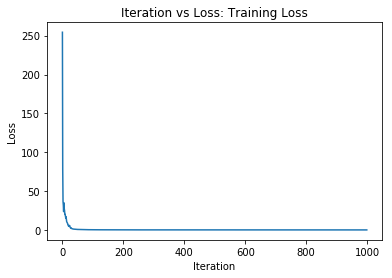

Validation Loss : 36.829780


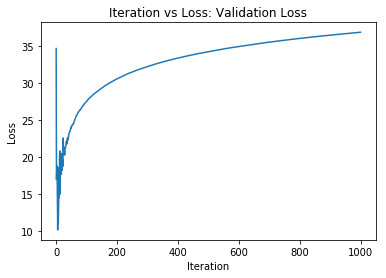

In [7]:

h4 = 4
h3 = 8
h2 = 12
h1 = 16
L = len(W)-1

W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,h3]),
         np.random.normal(0,0.1,[h3,h4]),
         np.random.normal(0,0.1,[h4,1])]

b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[h3,1]),
         np.random.normal(0,0.1,[h4,1]),
         np.random.normal(0,0.1,[1,1])]

#Mod handles print interval
mod = 100
fn_empty_loss_list()

fn_nn(0.03, 1000, False)

# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 0.036329


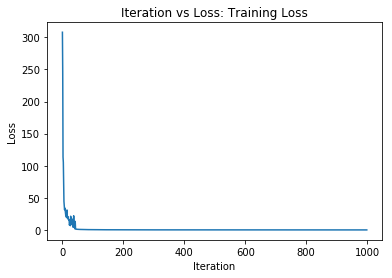

Validation Loss : 43.218349


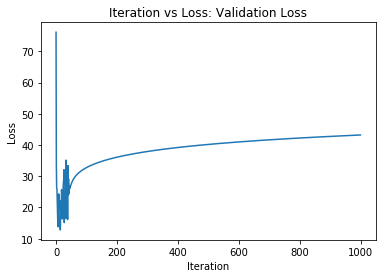

In [8]:
h9 = 2
h8 = 5
h7 = 10
h6 = 20
h5 = 40
h4 = 50
h3 = 60
h2 = 80
h1 = 100
L = len(W)-1

W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,h3]),
         np.random.normal(0,0.1,[h3,h4]),
         np.random.normal(0,0.1,[h4,h5]),
         np.random.normal(0,0.1,[h5,h6]),
         np.random.normal(0,0.1,[h6,h7]),
         np.random.normal(0,0.1,[h7,h8]),
         np.random.normal(0,0.1,[h8,h9]),
         np.random.normal(0,0.1,[h9,1])]

b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[h3,1]),
         np.random.normal(0,0.1,[h4,1]),
         np.random.normal(0,0.1,[h5,1]),
         np.random.normal(0,0.1,[h6,1]),
         np.random.normal(0,0.1,[h7,1]),
         np.random.normal(0,0.1,[h8,1]),
         np.random.normal(0,0.1,[h9,1]),
         np.random.normal(0,0.1,[1,1])]

#Mod handles print interval
mod = 100
fn_empty_loss_list()

fn_nn(0.03, 1000, False)

# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')


**Results**

Each result considers 1000 iterations.

| #|Learning Rate|  # Layers | # Hidden Units | Final Training Loss | Final Validation Loss|
|-:|--------|-----------------:|---------------:|---------------------:|--------------:|-----------------:|
| 1|     0.03     |     3     |     6, 5     |     0.165205    |     34.507632|
| 2|     0.03     |     5     |     16, 12, 8, 4     |     0.016381     |     36.829780|
| 3|     0.03     |     10     |     100, 80, 60, 50, 40, 20, 10, 5, 2     |     0.036329     |     43.218349|

Based on above experiment the training loss and validation loss exhibit overfitting of the model. The second models seems best if we consider the lowest validation loss. Also the training loss is the lowest of the three in this experiment.


## Question 4

Modify the backpropagation procedure to use mini-batches of a few different sizes such as 10, 20, and 40. Take care that each mathematical operation is efficient (avoid any for loops over the examples in a mini-batch). Repeat your experiments and report the results. Do you observe any differences in terms of accuracy and number of iterations to converge?

Training Loss : 0.594667


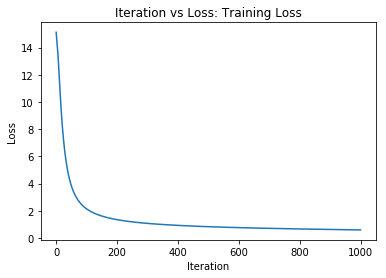

Validation Loss : 0.875617


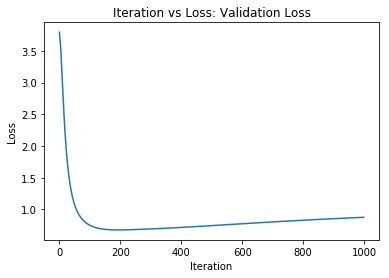

In [9]:
# Code goes here

def lossMiniBatch(y, yhat, batch_size):
    return (-((1-y).T * np.log(1-yhat.T) + y.T * np.log(yhat.T)))[0,0]/batch_size

# Training Set
import math
batch_size = 10

def fn_nn_with_mini_batch (alpha, max_iter, batch_size, print_iter=False):
    
    reps = math.ceil(Mt/batch_size)

    for iter in range(0, max_iter):

        #For training
        train_loss_this_iter = 0
        order = np.random.permutation(Mt) #Mt -> num of train samples

        for i in range(0,reps):
            # Grab the pattern order[i]
            start = i * batch_size
            end = start + batch_size

            if(end >= Mt):
                end = Mt

            x_this = XX_train[start:end,:].T
            y_this = y_train[start:end,0]

            # Feed forward step

            a = [x_this]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(W[l].T*a[l-1]+b[l])
                a.append(act(z[l]))
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])

            # Loss function for mini batch
            loss_this_pattern = lossMiniBatch(y_this, a[L], batch_size)
            train_loss_this_iter = train_loss_this_iter + loss_this_pattern

            # Backprop step
            delta[L] = a[L] - y_this.T
            for l in range(L,0,-1):
                db[l] = delta[l].copy()
                #Mean bias value for each batch
                db[l] = db[l].mean()

                dW[l] = a[l-1] * delta[l].T
                dW[l] = dW[l]/batch_size
                if l > 1:
                    delta[l-1] = np.multiply(actder(z[l-1]), W[l] * delta[l])

            # Check delta calculation

            if False:
                print('Target: %f' % y_this)
                print('y_hat: %f' % a[L][0,0])
                print(db)
                y_pred = ff(x_this,W,b)
                diff = 1e-3
                W[1][10,0] = W[1][10,0] + diff
                y_pred_db = ff(x_this,W,b)
                L1 = lossMiniBatch(y_this,y_pred, batch_size)
                L2 = lossMiniBatch(y_this,y_pred_db, batch_size)
                db_finite_difference = (L2-L1)/diff
                print('Original out %f, perturbed out %f' %
                     (y_pred[0,0], y_pred_db[0,0]))
                print('Theoretical dW %f, calculated db %f' %
                      (dW[1][10,0], db_finite_difference[0,0]))

            for l in range(1,L+1):            
                W[l] = W[l] - alpha * dW[l]
                b[l] = b[l] - alpha * db[l]

        if print_iter:
            if (iter+1) % mod == 0:
                print('Iteration %d Training loss %f' % (iter+1, train_loss_this_iter))
        train_loss.append(train_loss_this_iter)

        #For validation
        if True:
            val_loss_this_iter = 0
            for i in range(0,Nt):
                start = i * batch_size
                end = start + batch_size

                if(end >= Nt):
                    end = Nt

                x_this = XX_val[start:end,:].T
                y_this = y_val[start:end,0]

                # Feed forward step

                a = [x_this]
                z = [[]]
                delta = [[]]
                dW = [[]]
                db = [[]]
                for l in range(1,L+1):
                    z.append(W[l].T*a[l-1]+b[l])
                    a.append(act(z[l]))
                    # Just to give arrays the right shape for the backprop step
                    delta.append([]); dW.append([]); db.append([])

                loss_this_pattern = lossMiniBatch(y_this, a[L], batch_size)
                val_loss_this_iter = val_loss_this_iter + loss_this_pattern

                # Check delta calculation

                if False:
                    print('Target: %f' % y_this)
                    print('y_hat: %f' % a[L][0,0])
                    print(db)
                    y_pred = ff(x_this,W,b)
                    diff = 1e-3
                    W[1][10,0] = W[1][10,0] + diff
                    y_pred_db = ff(x_this,W,b)
                    L1 = lossMiniBatch(y_this,y_pred,batch_size)
                    L2 = lossMiniBatch(y_this,y_pred_db,batch_size)
                    db_finite_difference = (L2-L1)/diff
                    print('Original out %f, perturbed out %f' %
                         (y_pred[0,0], y_pred_db[0,0]))
                    print('Theoretical dW %f, calculated db %f' %
                          (dW[1][10,0], db_finite_difference[0,0]))
            if print_iter:
                if (iter+1) % mod == 0:
                    print('Iteration %d Validation loss %f' % (iter+1, val_loss_this_iter))
            val_loss.append(val_loss_this_iter)

#Mod handles print interval
mod = 100

h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

fn_empty_loss_list()
                    
#fn_nn_with_mini_batch (alpha, max_iter, batch_size, verbose=False)
fn_nn_with_mini_batch (0.03, 1000, 20, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')




Training Loss : 0.384468


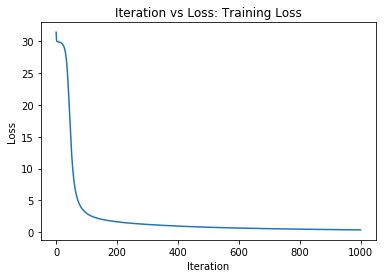

Validation Loss : 2.412490


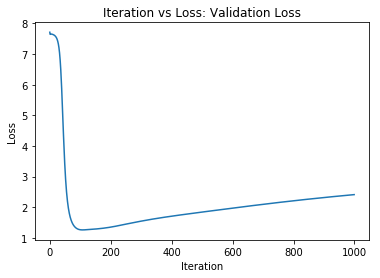

In [10]:
#Layer 3
h2 = 5
h1 = 6

W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,1])]

b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[1,1])]

L = len(W)-1

fn_empty_loss_list()

fn_nn_with_mini_batch (0.03, 1000, 10, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 0.333269


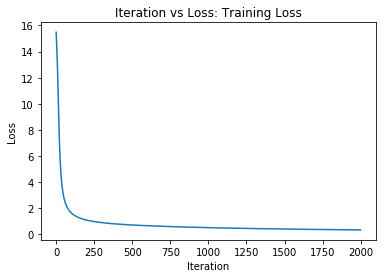

Validation Loss : 1.116869


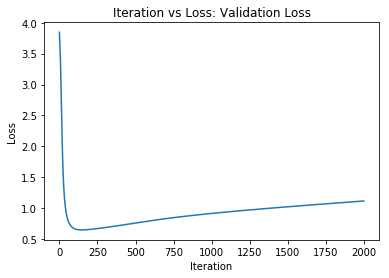

In [11]:
h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

fn_empty_loss_list()

fn_nn_with_mini_batch (0.03, 2000, 20, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 0.226217


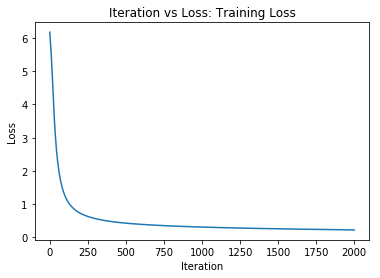

Validation Loss : 0.340759


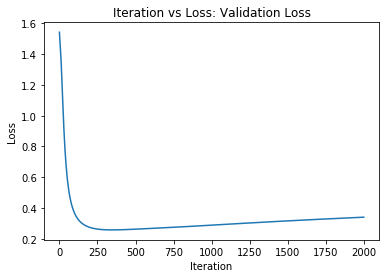

In [12]:
h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

fn_empty_loss_list()

fn_nn_with_mini_batch (0.03, 2000, 50, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')


| #|Iterations|Learning Rate|  # Layers | Batch Size| Final Training Loss | Final Validation Loss|
|-:|--------|--------|-----------------:|---------------:|---------------------:|--------------:|-----------------:|
| 1|    1000 |0.03     |     3     |    10    |    0.384468     |     2.412490|
| 2|   2000  |0.03     |     2     |     20     |     0.333269    |     1.116869|
| 3|   2000  |0.03     |     2    |     50     |     0.226217    |     0.340759|


Minibatch coverges more quickly and more efficiently than stochastic or miniBatch = 1 approach. Also I found that minibatch increases accuracy of the model. In the above experiments the training and the validation loss are much better than miniBatch = 1 approach.

## Question 5

Modify the model to use the ReLU activation function in the hidden layers rather than logistic sigmoid. Repeat your experiments and report the results. Do you observe any differences in terms of accuracy and number of iterations to converge?

In [113]:
# Code goes here
def actRelu(z):
    z=np.nan_to_num(z)
    return np.maximum(z, np.zeros(z.shape))

def actderRelu(z):
    z=np.nan_to_num(z)
    res = np.zeros(z.shape)
    res[z>0] = 1
    return res

def act(z):
    z=np.nan_to_num(z)
    z[z<1e-6] = 1e-6
    return 1/(1+np.exp(-z))

def actder(z):
    z=np.nan_to_num(z)
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod

def ff(x,W,b):
    L = len(W)-1
    a = x
    for l in range(1,L+1):
        z = W[l].T*a+b[l]
        a = act(z)
    return a

def lossMiniBatchRelu(y, yhat, batch_size):
    yhat = np.nan_to_num(yhat)
    yhat[yhat == 1] = 1 - 1e-6
    yhat[yhat<1e-6] = 1e-6
    return (-((1-y.T) * np.log(1-yhat.T) + y.T * np.log(yhat.T)))[0,0]/batch_size

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Training Loss : 4.289507


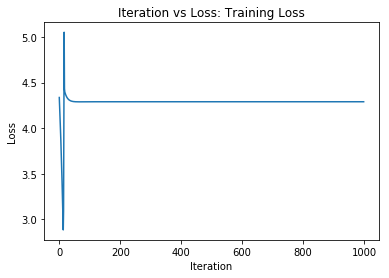

Validation Loss : 1.079921


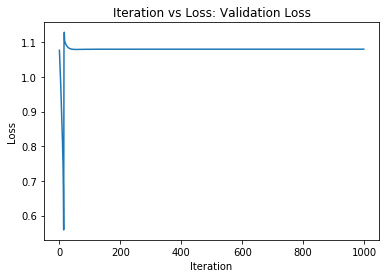

In [130]:
def fn_nn_with_mini_batch_relu (alpha, max_iter, batch_size, print_iter=False):
    
    reps = math.ceil(Mt/batch_size)

    for iter in range(0, max_iter):

        #For training
        train_loss_this_iter = 0
        order = np.random.permutation(Mt) #Mt -> num of train samples

        for i in range(0,reps):
            # Grab the pattern order[i]
            start = i * batch_size
            end = start + batch_size

            if(end >= Mt):
                end = Mt

            x_this = XX_train[start:end,:].T
            y_this = y_train[start:end,0]

            # Feed forward step

            a = [x_this]
            z = [[]]
            delta = [[]]
            dW = [[]]
            db = [[]]
            for l in range(1,L+1):
                z.append(np.nan_to_num(W[l]).T*np.nan_to_num(a[l-1])+np.nan_to_num(b[l]))
                if l == L:
                    a.append(act(z[l]))
                else:
                    a.append(actRelu(z[l]))
                # Just to give arrays the right shape for the backprop step
                delta.append([]); dW.append([]); db.append([])

            # Loss function for mini batch
            loss_this_pattern = lossMiniBatchRelu(y_this, a[L], batch_size)
            train_loss_this_iter = train_loss_this_iter + loss_this_pattern

            # Backprop step
            delta[L] = a[L] - y_this.T
            for l in range(L,0,-1):
                db[l] = delta[l].copy()
                #Mean bias value for each batch
                db[l] = db[l].mean()

                dW[l] = a[l-1] * delta[l].T
                dW[l] = dW[l]/batch_size
                if l > 1:
                    delta[l-1] = np.multiply(actRelu(z[l-1]), np.nan_to_num(W[l]) * delta[l])
                    #print(delta[l])

            # Check delta calculation

            if False:
                print('Target: %f' % y_this)
                print('y_hat: %f' % a[L][0,0])
                print(db)
                y_pred = ff(x_this,W,b)
                diff = 1e-3
                W[1][10,0] = W[1][10,0] + diff
                y_pred_db = ff(x_this,W,b)
                L1 = lossMiniBatchRelu(y_this,y_pred, batch_size)
                L2 = lossMiniBatchRelu(y_this,y_pred_db, batch_size)
                db_finite_difference = (L2-L1)/diff
                print('Original out %f, perturbed out %f' %
                     (y_pred[0,0], y_pred_db[0,0]))
                print('Theoretical dW %f, calculated db %f' %
                      (dW[1][10,0], db_finite_difference[0,0]))

            for l in range(1,L+1):            
                W[l] = W[l] - alpha * dW[l]
                b[l] = b[l] - alpha * db[l]

        if print_iter:
            if (iter+1) % mod == 0:
                print('Iteration %d Training loss %f' % (iter+1, train_loss_this_iter))
        train_loss.append(train_loss_this_iter)

        #For validation
        if True:
            val_loss_this_iter = 0
            for i in range(0,Nt):
                start = i * batch_size
                end = start + batch_size

                if(end >= Nt):
                    end = Nt

                x_this = XX_val[start:end,:].T
                y_this = y_val[start:end,0]

                # Feed forward step

                a = [x_this]
                z = [[]]
                delta = [[]]
                dW = [[]]
                db = [[]]
                for l in range(1,L+1):
                    z.append(W[l].T*a[l-1]+b[l])
                    if l == L:
                        a.append(act(z[l]))
                    else:
                        a.append(actRelu(z[l]))
                    # Just to give arrays the right shape for the backprop step
                    delta.append([]); dW.append([]); db.append([])

                loss_this_pattern = lossMiniBatchRelu(y_this, a[L], batch_size)
                val_loss_this_iter = val_loss_this_iter + loss_this_pattern

                # Check delta calculation

                if False:
                    print('Target: %f' % y_this)
                    print('y_hat: %f' % a[L][0,0])
                    print(db)
                    y_pred = ff(x_this,W,b)
                    diff = 1e-3
                    W[1][10,0] = W[1][10,0] + diff
                    y_pred_db = ff(x_this,W,b)
                    L1 = lossMiniBatchRelu(y_this,y_pred,batch_size)
                    L2 = lossMiniBatchRelu(y_this,y_pred_db,batch_size)
                    db_finite_difference = (L2-L1)/diff
                    print('Original out %f, perturbed out %f' %
                         (y_pred[0,0], y_pred_db[0,0]))
                    print('Theoretical dW %f, calculated db %f' %
                          (dW[1][10,0], db_finite_difference[0,0]))
            if print_iter:
                if (iter+1) % mod == 0:
                    print('Iteration %d Validation loss %f' % (iter+1, val_loss_this_iter))
            val_loss.append(val_loss_this_iter)

#Mod handles print interval
mod = 100
fn_empty_loss_list()

h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

#fn_nn_with_mini_batch_relu (alpha, max_iter, batch_size, verbose=False)
fn_nn_with_mini_batch_relu (0.03, 1000, 70, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')


Training Loss : 4.287984


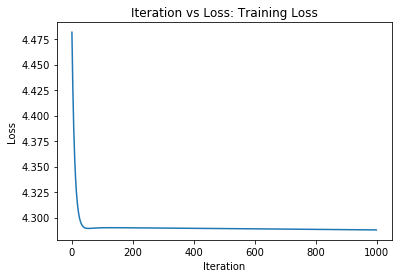

Validation Loss : 1.079306


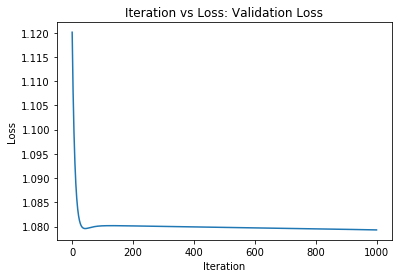

In [124]:
#Mod handles print interval
mod = 100
fn_empty_loss_list()

h3 = 2
h2 = 5
h1 = 8

W = [[], np.random.normal(0,0.1,[N,h1]), np.random.normal(0,0.1,[h1,h2]), np.random.normal(0,0.1,[h2,h3]), np.random.normal(0,0.1,[h3,1])]

b = [[], np.random.normal(0,0.1,[h1,1]), np.random.normal(0,0.1,[h2,1]), np.random.normal(0,0.1,[h3,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

#fn_nn_with_mini_batch_relu (alpha, max_iter, batch_size, verbose=False)
fn_nn_with_mini_batch_relu (0.03, 1000, 70, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 2.999261


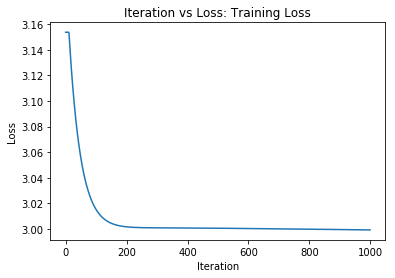

Validation Loss : 0.755106


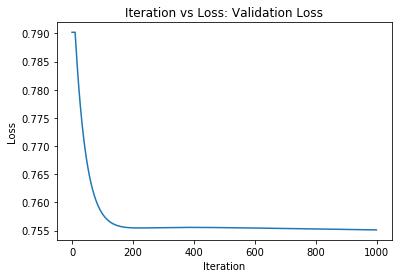

In [125]:
#Mod handles print interval
mod = 100
fn_empty_loss_list()

h4 = 3
h3 = 5
h2 = 8
h1 = 12


W = [[], np.random.normal(0,0.1,[N,h1]), 
     np.random.normal(0,0.1,[h1,h2]), 
     np.random.normal(0,0.1,[h2,h3]), 
     np.random.normal(0,0.1,[h3,1])]

b = [[], np.random.normal(0,0.1,[h1,1]), 
     np.random.normal(0,0.1,[h2,1]), 
     np.random.normal(0,0.1,[h3,1]), 
     np.random.normal(0,0.1,[1,1])]
L = len(W)-1

#fn_nn_with_mini_batch_relu (alpha, max_iter, batch_size, verbose=False)
fn_nn_with_mini_batch_relu (0.01, 1000, 100, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

Training Loss : 5.897337


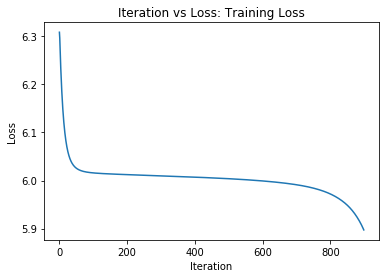

Validation Loss : 1.481360


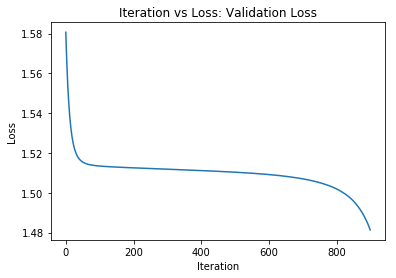

In [135]:
#Mod handles print interval
mod = 100
fn_empty_loss_list()

h5 = 2
h4 = 3
h3 = 5
h2 = 8
h1 = 12


W = [[], np.random.normal(0,0.1,[N,h1]), 
     np.random.normal(0,0.1,[h1,h2]), 
     np.random.normal(0,0.1,[h2,h3]), 
     np.random.normal(0,0.1,[h3,1])]

b = [[], np.random.normal(0,0.1,[h1,1]), 
     np.random.normal(0,0.1,[h2,1]), 
     np.random.normal(0,0.1,[h3,1]), 
     np.random.normal(0,0.1,[1,1])]
L = len(W)-1

#fn_nn_with_mini_batch_relu (alpha, max_iter, batch_size, verbose=False)
fn_nn_with_mini_batch_relu (0.02, 900, 50, False)
    
# Plot training loss
plot_graph(train_loss, 'Training Loss')

# Plot validation loss
plot_graph(val_loss, 'Validation Loss')

| #|Iterations|Learning Rate|  # Layers | Batch Size| Final Training Loss | Final Validation Loss|
|-:|--------|--------|-----------------:|---------------:|---------------------:|--------------:|-----------------:|
| 1|    1000 |0.03     |     4     |    70    |    4.287984     |     1.079306|
| 2|   2000  |0.02     |     5     |     100     |     2.999261    |     0.755106|
| 3|   700  |0.02     |     6    |     50     |     5.897337    |     1.481360|


Using ReLU activation function in the hidden layers, the model learns faster. It also results in better training and validation accuracy. In the experiments above we can see that using ReLU, convergence is faster.